In [1]:
import sys
import numpy as np
from ml_datasets.esl import Mixture
from ml_datasets.utils import plot_2D

In [2]:
mixture = Mixture()
x, y = mixture.load()

Retrieving ESL-Mixture dataset...
C:\Users\mzyskk\AppData\Local\Temp\ESL\ESL.mixture.rda available locally, skip downloading


In [3]:
print("x: {}, y: {}".format(x.shape, y.shape))

x: (200, 2), y: (200,)


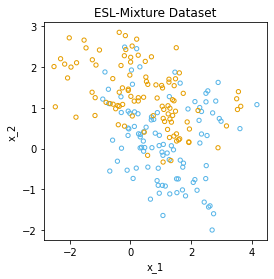

In [4]:
plt = plot_2D(x, y, "ESL-Mixture Dataset", axis='on')

In [5]:
# append intercept in the input x, so x = [x1, x2, 1]
x = np.concatenate((x, np.ones_like(x[:, 0].reshape(-1, 1))), axis=1)

Solution of the least square is: $\beta = (x^\top x)^{-1} x^\top y$

In [6]:
# check if dot(x.T, x) is invertible
if np.linalg.cond(np.dot(x.T, x)) < 1/sys.float_info.epsilon:
    beta_hat = np.dot(np.dot(np.linalg.inv(np.dot(x.T, x)), x.T), y)
else:
    print("dot(x.T, x) is ill-conditioned")
    sys.exit()

The estimated output is given as $\hat y = x \hat\beta$

In [7]:
y_hat = np.dot(x, beta_hat)

And the final classification output is given as:

$\hat G = \begin{cases}
    \color{orange}{\text{ORANGE}} \color{black}{\text{ or 1}}, & \text{if } \hat y > 0.5\\
    \color{blue}{\text{BLUE}} \color{black}{\text{ or 0}},              & \text{if } \hat y \leq 0.5
\end{cases}$

In [8]:
threshold = 0.5
G_hat = np.array([1 if y_hat_ > threshold else 0 for y_hat_ in y_hat]).astype(int)

The decision boundary is given as $\hat y = 0.5 = x \beta = x_1\beta_1 + x_2\beta_2 +\beta_3$, which implies $x_2 = -\frac{\hat\beta_1}{\hat\beta_2} x_1+ \frac{0.5}{\hat\beta_2} - \frac{\hat\beta_3}{\hat\beta_2}, \forall x_1 \in \mathcal{R}$

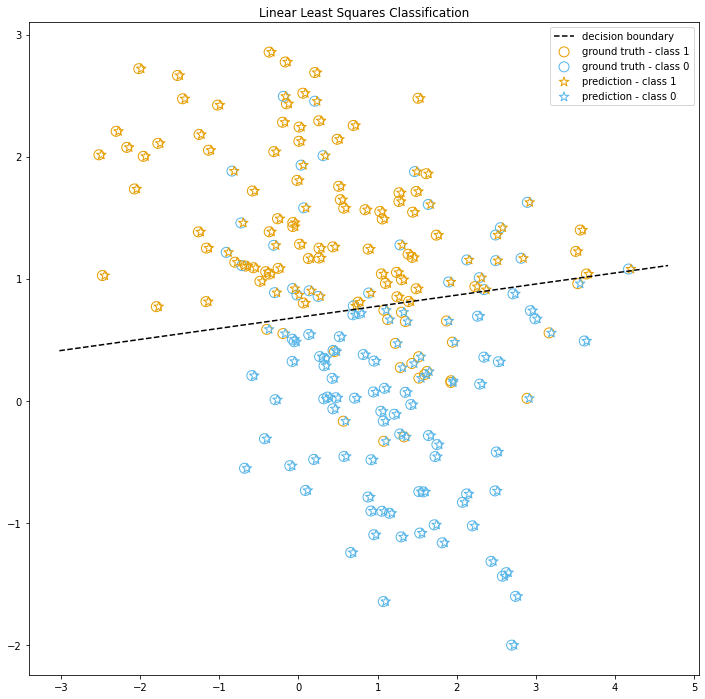

In [9]:
# plot the classification results and decision boundary
BLUE, ORANGE = "#57B5E8", "#E69E00"
x_1 = np.linspace(min(x[:, 0]) - 0.5, max(x[:, 0]) + 0.5,100)
x_2 = - (beta_hat[0] / beta_hat[1]) * x_1 + (threshold / beta_hat[1]) - (beta_hat[2] / beta_hat[1])
plt.figure(figsize=(12, 12))
plt.scatter(x[:, 0][y==1], x[:, 1][y==1], s=100, marker="o", edgecolors=ORANGE, facecolors="none", label='ground truth - class 1')
plt.scatter(x[:, 0][y==0], x[:, 1][y==0], s=100, marker="o", edgecolors=BLUE, facecolors="none", label='ground truth - class 0')
plt.scatter(x[:, 0][G_hat==1] + 0.03, x[:, 1][G_hat==1], s=100, marker="*", edgecolors=ORANGE, facecolors="none", label='prediction - class 1')
plt.scatter(x[:, 0][G_hat==0] + 0.03, x[:, 1][G_hat==0], s=100, marker="*", edgecolors=BLUE, facecolors="none", label='prediction - class 0')
plt.plot(x_1, x_2, '--k', label='decision boundary')
plt.legend()
plt.title("Linear Least Squares Classification")
plt.show()